In [2]:
import numpy as np
import pandas as pd
import scipy as sp

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20,10]

from scipy.sparse import load_npz
from scipy.sparse import csr_matrix, hstack, save_npz

## Reading Wim Data

In [3]:
data = np.load('inga_out.npz')

In [4]:
mass = data['arr_0']
mass

array([ 552.293448,  338.046024,  724.221464, ...,  328.072907,
        262.19328 ,  636.278192])

In [5]:
name = data['arr_1']
name

array(['UNPD98266', 'UNPD207163', 'UNPD3499', ..., 'UNPD98267',
       'UNPD47332', 'UNPD101003'], dtype=object)

In [6]:
massabund = data['arr_2']
massabund

array([[  41.00329 ,    1.688456],
       [  43.01894 ,    2.135631],
       [  55.01894 ,    1.105409],
       ..., 
       [ 549.23414 ,   24.377134],
       [ 551.24979 ,   22.666363],
       [ 591.2447  ,    5.496205]])

In [7]:
blockind = data['arr_3']
blockind

array([     0,      0,      0, ..., 220988, 220988, 220988], dtype=uint32)

In [8]:
wim = pd.DataFrame({'comp_name': name, 'mass': mass})
wim.head()

,comp_name,mass
0,UNPD98266,552.293448
1,UNPD207163,338.046024
2,UNPD3499,724.221464
3,UNPD3498,154.099380
4,UNPD101002,793.294570


In [9]:
wim.shape

(220989, 2)

In [10]:
wim_inga = wim[wim['comp_name'].str.match('Inga')]
wim_inga.head()

,comp_name,mass
131,Inga_compound_2296,1728.783400
132,Inga_compound_2295,585.089720
133,Inga_compound_2293,987.533777
134,Inga_compound_2292,1154.570300
135,Inga_compound_2291,722.174222


In [11]:
wim_inga.shape

(3291, 2)

In [12]:
wim_silico = wim[wim['comp_name'].str.match('UNPD')]
wim_silico.head()

,comp_name,mass
0,UNPD98266,552.293448
1,UNPD207163,338.046024
2,UNPD3499,724.221464
3,UNPD3498,154.099380
4,UNPD101002,793.294570


In [13]:
wim_silico.shape

(217698, 2)

## Reading Peak & Loss Data

In [14]:
raw = pd.read_pickle('mz_and_losses_long_2018_07_09.pkl')
raw.shape

(2615424, 3)

In [15]:
raw.head()

,comp_name,feature_name,intensity
4,UNPD98266,peak_110,1.294890
5,UNPD98266,peak_191,2.076612
12,UNPD98266,peak_5691,16.325846
18,UNPD98266,peak_6984,2.461923
24,UNPD3499,peak_191,3.612248


### Peak Data

In [16]:
peak = raw[raw['feature_name'].str.match('peak')]
peak.shape

(1214577, 3)

In [17]:
peak.head()

,comp_name,feature_name,intensity
4,UNPD98266,peak_110,1.294890
5,UNPD98266,peak_191,2.076612
12,UNPD98266,peak_5691,16.325846
18,UNPD98266,peak_6984,2.461923
24,UNPD3499,peak_191,3.612248


In [18]:
peak_inga = peak[peak['comp_name'].str.match('Inga')]
peak_inga.shape

(53508, 3)

In [19]:
peak_silico = peak[peak['comp_name'].str.match('UNPD')]
peak_silico.shape

(1161069, 3)

### Loss Data

In [20]:
loss = raw[raw['feature_name'].str.match('loss')]
loss.shape

(1400847, 3)

In [21]:
loss_inga = loss[loss['comp_name'].str.match('Inga')]
loss_inga.shape

(53508, 3)

In [22]:
loss_silico = loss[loss['comp_name'].str.match('UNPD')]
loss_silico.shape

(1347339, 3)

## Reading Classes Data

In [13]:
classes = pd.read_pickle('compound_names_with_classes.pkl')
classes.head(3)

,Phenolic,Flavonoid,Flavone,Flavonol,DihydroFlavone,Flavan3ol,Dihydroflavonol,Anthocyanidin,Chalcone,Aurone,...,QuinicAcid,Naringenin,Catechin_OR_Epicatechin,Myricetin,Kaempferol,Afzelechin,Gallocatechin,Quercetin,Apigenin,compound_id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD98266
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD3499
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD3493


In [14]:
classes = classes.rename(columns={'compound_id': 'comp_name'})
classes.head(3)

,Phenolic,Flavonoid,Flavone,Flavonol,DihydroFlavone,Flavan3ol,Dihydroflavonol,Anthocyanidin,Chalcone,Aurone,...,QuinicAcid,Naringenin,Catechin_OR_Epicatechin,Myricetin,Kaempferol,Afzelechin,Gallocatechin,Quercetin,Apigenin,comp_name
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD98266
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD3499
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD3493


In [15]:
classes.shape

(76903, 72)

In [26]:
classes_silico = classes[classes['comp_name'].str.match('UNPD')]
classes_silico.shape

(76061, 72)

In [27]:
classes_inga = classes[classes['comp_name'].str.match('Inga_compound')]
classes_inga.shape

(842, 72)

## Dealing with Peak Data

### Generating dictionaries

#### feature_name dictionary

In [28]:
fnames = peak['feature_name'].unique()
fnames

array(['peak_110', 'peak_191', 'peak_5691', ..., 'peak_33790',
       'peak_35474', 'peak_3893'], dtype=object)

In [29]:
fnumbers = np.array([int(str(x)[5:]) for x in fnames])
fnumbers

array([  110,   191,  5691, ..., 33790, 35474,  3893])

In [30]:
fnumbers_sorted = np.sort(fnumbers)
fnumbers_sorted

array([    2,     3,     4, ..., 37325, 37329, 37331])

In [31]:
fnames_sorted = np.array(['peak_'+str(x) for x in fnumbers_sorted])
fnames_sorted

array(['peak_2', 'peak_3', 'peak_4', ..., 'peak_37325', 'peak_37329',
       'peak_37331'],
      dtype='<U10')

In [32]:
fdict = pd.Series(data=np.arange(len(fnames)), index=fnames_sorted, name='feature_id')
fdict.head()

peak_2    0
peak_3    1
peak_4    2
peak_7    3
peak_8    4
Name: feature_id, dtype: int64

#### comp_name dictionary: inga

In [34]:
cnames_inga1 = set(peak_inga['comp_name'].unique())
len(cnames_inga1)

3291

In [35]:
cnames_inga2 = set(classes_inga['comp_name'].unique())
len(cnames_inga2)

842

In [36]:
cnames_inga = cnames_inga1.intersection(cnames_inga2)
len(cnames_inga)

842

In [37]:
cnumbers_inga = np.array([int(str(x)[14:]) for x in cnames_inga])
cnumbers_inga

array([1522, 4208, 3210, 3081, 2277,  783, 1452, 1006, 3072,   76, 2487,
       1296, 2092, 2050, 4483, 3636, 4638, 2735, 1633, 1130, 1539, 1227,
       2072, 1166,   35, 1406, 1773, 2700, 2418,  778, 1465, 3131, 2800,
       1101, 4032,  465, 2278, 3220, 4297, 4142,  356, 2616, 2042, 4293,
       2245, 2605, 2480,  377, 1458, 2632, 4650, 4131, 2756, 1914, 1350,
       1835, 2725, 3991, 2599, 4309,   53,  406, 3554,  308,  662, 4150,
        916, 2101, 3149,  863, 1012, 1801, 4583, 2361, 2033, 2992,   90,
       1971,  697, 2951, 3734,  922,   55, 2844, 1426,  617, 1656, 1976,
       1570,  418, 2289, 1517, 2768, 2067,  747, 1831, 1476, 4246, 2240,
       4631,   41, 2424, 1172, 2630, 3090,  604, 4000, 4122,  141, 1209,
        457,  663, 3893, 4427,   63,  168, 4570,  394, 2162, 4476, 1679,
        691, 1396, 1376,   56, 2695,  832, 2913, 1074,   89,  368, 1142,
       2960,  189, 1372, 2694, 3550,  998, 3366, 3456, 3822, 2204,  436,
       3990, 2178,  121,  329, 2921, 4041,   57,  7

In [38]:
cnumbers_inga_sorted = np.sort(cnumbers_inga)
cnumbers_inga_sorted

array([  15,   18,   20,   24,   25,   26,   27,   29,   32,   35,   41,
         42,   44,   47,   50,   53,   55,   56,   57,   60,   63,   67,
         70,   71,   72,   76,   79,   87,   88,   89,   90,   92,   93,
         96,  109,  114,  115,  118,  119,  120,  121,  125,  127,  129,
        130,  131,  132,  138,  141,  142,  147,  150,  155,  159,  162,
        167,  168,  172,  174,  175,  176,  180,  181,  188,  189,  193,
        196,  214,  218,  221,  223,  227,  229,  230,  231,  233,  244,
        246,  251,  255,  256,  262,  267,  280,  284,  292,  293,  296,
        302,  308,  310,  329,  334,  339,  343,  344,  345,  346,  351,
        352,  356,  364,  365,  368,  376,  377,  379,  385,  388,  390,
        391,  394,  395,  396,  400,  406,  408,  409,  413,  418,  419,
        421,  427,  433,  436,  443,  449,  450,  457,  465,  468,  474,
        475,  480,  491,  493,  494,  500,  502,  505,  511,  524,  531,
        539,  540,  550,  555,  563,  568,  570,  5

In [39]:
cnames_inga_sorted = np.array(['Inga_compound_'+str(x) for x in cnumbers_inga_sorted])
cnames_inga_sorted

array(['Inga_compound_15', 'Inga_compound_18', 'Inga_compound_20',
       'Inga_compound_24', 'Inga_compound_25', 'Inga_compound_26',
       'Inga_compound_27', 'Inga_compound_29', 'Inga_compound_32',
       'Inga_compound_35', 'Inga_compound_41', 'Inga_compound_42',
       'Inga_compound_44', 'Inga_compound_47', 'Inga_compound_50',
       'Inga_compound_53', 'Inga_compound_55', 'Inga_compound_56',
       'Inga_compound_57', 'Inga_compound_60', 'Inga_compound_63',
       'Inga_compound_67', 'Inga_compound_70', 'Inga_compound_71',
       'Inga_compound_72', 'Inga_compound_76', 'Inga_compound_79',
       'Inga_compound_87', 'Inga_compound_88', 'Inga_compound_89',
       'Inga_compound_90', 'Inga_compound_92', 'Inga_compound_93',
       'Inga_compound_96', 'Inga_compound_109', 'Inga_compound_114',
       'Inga_compound_115', 'Inga_compound_118', 'Inga_compound_119',
       'Inga_compound_120', 'Inga_compound_121', 'Inga_compound_125',
       'Inga_compound_127', 'Inga_compound_129', 'Inga

In [40]:
cdict_inga = pd.Series(data=np.arange(len(cnames_inga)), index=cnames_inga_sorted, name='comp_id')
cdict_inga.head()

Inga_compound_15    0
Inga_compound_18    1
Inga_compound_20    2
Inga_compound_24    3
Inga_compound_25    4
Name: comp_id, dtype: int64

#### comp_name dictionary: silico

In [41]:
cnames_silico1 = set(peak_silico['comp_name'].unique())
len(cnames_silico1)

75785

In [42]:
cnames_silico2 = set(classes_silico['comp_name'].unique())
len(cnames_silico2)

76061

In [43]:
cnames_silico = cnames_silico1.intersection(cnames_silico2)
len(cnames_silico)

75785

In [44]:
cnumbers_silico = np.array([int(str(x)[4:]) for x in cnames_silico])
cnumbers_silico

array([183117,  89468,   1824, ..., 214403,  64644, 158374])

In [45]:
cnumbers_silico_sorted = np.sort(cnumbers_silico)
cnumbers_silico_sorted

array([     2,      6,     10, ..., 230721, 230723, 230730])

In [46]:
cnames_silico_sorted = np.array(['UNPD'+str(x) for x in cnumbers_silico_sorted])
cnames_silico_sorted

array(['UNPD2', 'UNPD6', 'UNPD10', ..., 'UNPD230721', 'UNPD230723',
       'UNPD230730'],
      dtype='<U10')

In [47]:
cdict_silico = pd.Series(data=np.arange(len(cnames_silico)), index=cnames_silico_sorted, name='comp_id')
cdict_silico.head()

UNPD2     0
UNPD6     1
UNPD10    2
UNPD13    3
UNPD17    4
Name: comp_id, dtype: int64

### Inga Data

#### Appending new columns

In [48]:
ind_peak_inga = peak_inga['comp_name'].apply(lambda x: x in cnames_inga)
ind_peak_inga.shape

(53508,)

In [49]:
new_peak_inga = peak_inga[ind_peak_inga]
new_peak_inga.shape

(13599, 3)

In [50]:
new_peak_inga['feature_id'] = new_peak_inga['feature_name'].map(lambda x: fdict.get(x))

/uufs/chpc.utah.edu/sys/installdir/python/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
new_peak_inga['comp_id'] = new_peak_inga['comp_name'].map(lambda x: cdict_inga.get(x))

/uufs/chpc.utah.edu/sys/installdir/python/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
new_peak_inga.head()

,comp_name,feature_name,intensity,feature_id,comp_id
1412,Inga_compound_2295,peak_746,15504.016632,413,470
1413,Inga_compound_2295,peak_907,13900.255432,490,470
1414,Inga_compound_2295,peak_1249,7572.683838,655,470
1415,Inga_compound_2295,peak_1259,12585.825684,659,470
1416,Inga_compound_2295,peak_1272,15757.078171,665,470


#### Generating sparse matrix

In [90]:
data = new_peak_inga['intensity']

In [91]:
row = new_peak_inga['comp_id']

In [92]:
col = new_peak_inga['feature_id']

In [93]:
mat_peak_inga_raw = csr_matrix((data, (row, col)))

In [100]:
mat_peak_inga_raw_shape = mat_peak_inga_raw.toarray().shape
mat_peak_inga_raw_shape

(842, 7491)

In [102]:
mat_addition = np.zeros((mat_peak_inga_raw_shape[0], fdict.max()+1-mat_peak_inga_raw_shape[1]))
mat_addition.shape

(842, 1)

In [104]:
mat_peak_inga = hstack([mat_peak_inga_raw, mat_addition])
mat_peak_inga.toarray().shape

(842, 7492)

### In Silico Data

#### Appending new columns

In [107]:
ind_peak_silico = peak_silico['comp_name'].apply(lambda x: x in cnames_silico)
ind_peak_silico.shape

(1161069,)

In [108]:
new_peak_silico = peak_silico[ind_peak_silico]
new_peak_silico.shape

(1161069, 3)

In [109]:
new_peak_silico['feature_id'] = new_peak_silico['feature_name'].map(lambda x: fdict.get(x))

In [110]:
new_peak_silico['comp_id'] = new_peak_silico['comp_name'].map(lambda x: cdict_silico.get(x))

In [111]:
new_peak_silico.head()

,comp_name,feature_name,intensity,feature_id,comp_id
4,UNPD98266,peak_110,1.294890,41,33294
5,UNPD98266,peak_191,2.076612,82,33294
12,UNPD98266,peak_5691,16.325846,1922,33294
18,UNPD98266,peak_6984,2.461923,2146,33294
24,UNPD3499,peak_191,3.612248,82,1201


In [112]:
new_peak_silico['feature_id'].nunique()

5127

In [113]:
new_peak_silico['feature_id'].max()

7451

#### Generating sparse matrix

In [114]:
data = new_peak_silico['intensity']

In [115]:
row = new_peak_silico['comp_id']

In [116]:
col = new_peak_silico['feature_id']

In [117]:
mat_peak_silico_raw = csr_matrix((data, (row, col)))

In [118]:
mat_peak_silico_raw_shape = mat_peak_silico_raw.toarray().shape
mat_peak_silico_raw_shape

(75785, 7452)

In [119]:
mat_addition = np.zeros((mat_peak_silico_raw_shape[0], fdict.max()+1-mat_peak_silico_raw_shape[1]))
mat_addition.shape

(75785, 40)

In [120]:
mat_peak_silico = hstack([mat_peak_silico_raw, mat_addition])
mat_peak_silico.toarray().shape

(75785, 7492)

## Dealing with Mass Data

### Inga Data

#### Filtering out unselected records

In [121]:
ind_wim_inga = wim_inga['comp_name'].apply(lambda x: x in cnames_inga)
ind_wim_inga.shape

(3291,)

In [122]:
new_wim_inga = wim_inga[ind_wim_inga]
new_wim_inga.shape

(842, 2)

#### Sorting by comp_id

In [123]:
new_wim_inga['comp_id'] = new_wim_inga['comp_name'].map(lambda x: cdict_inga.get(x))

/uufs/chpc.utah.edu/sys/installdir/python/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
new_wim_inga = new_wim_inga.set_index('comp_id')

In [125]:
new_wim_inga = new_wim_inga.sort_index()

In [126]:
new_wim_inga.shape

(842, 2)

In [127]:
new_wim_inga.head()

,comp_name,mass
comp_id,,
0,Inga_compound_15,471.055939
1,Inga_compound_18,449.107866
2,Inga_compound_20,938.509671
3,Inga_compound_24,1043.541300
4,Inga_compound_25,435.092107


#### Generating dense matrix

In [128]:
mat_wim_inga = new_wim_inga.iloc[:,-1].as_matrix()

In [129]:
mat_wim_inga.shape

(842,)

#### Merging with sparse peak matrix

In [130]:
mat_features_inga = hstack([mat_wim_inga.reshape(-1,1), mat_peak_inga])

In [131]:
mat_features_inga.toarray().shape

(842, 7493)

### In Silico Data

#### Filtering out unselected records

In [132]:
ind_wim_silico = wim_silico['comp_name'].apply(lambda x: x in cnames_silico)
ind_wim_silico.shape

(217698,)

In [133]:
new_wim_silico = wim_silico[ind_wim_silico]
new_wim_silico.shape

(75785, 2)

#### Sorting by comp_id

In [134]:
new_wim_silico['comp_id'] = new_wim_silico['comp_name'].map(lambda x: cdict_silico.get(x))

/uufs/chpc.utah.edu/sys/installdir/python/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [135]:
new_wim_silico = new_wim_silico.set_index('comp_id')

In [136]:
new_wim_silico = new_wim_silico.sort_index()

In [137]:
new_wim_silico.shape

(75785, 2)

In [138]:
new_wim_silico.head()

,comp_name,mass
comp_id,,
0,UNPD2,756.211294
1,UNPD6,472.209718
2,UNPD10,1434.489791
3,UNPD13,492.163162
4,UNPD17,330.131468


#### Generating dense matrix

In [139]:
mat_wim_silico = new_wim_silico.iloc[:,-1].as_matrix()

In [140]:
mat_wim_silico.shape

(75785,)

#### Merging with sparse peak matrix

In [141]:
mat_features_silico = hstack([mat_wim_silico.reshape(-1,1), mat_peak_silico])

In [142]:
mat_features_silico.toarray().shape

(75785, 7493)

## Dealing with Class Data

### Inga Data

#### Filtering out unselected records

In [304]:
ind_classes_inga = classes_inga['comp_name'].apply(lambda x: x in cnames_inga)
ind_classes_inga.shape

(842,)

In [305]:
new_classes_inga = classes_inga[ind_classes_inga]
new_classes_inga.shape

(842, 73)

#### Sorting by comp_id

In [306]:
new_classes_inga['comp_id'] = new_classes_inga['comp_name'].map(lambda x: cdict_inga.get(x))

In [307]:
new_classes_inga = new_classes_inga.set_index('comp_id')

In [308]:
new_classes_inga = new_classes_inga.sort_index()

In [309]:
new_classes_inga.shape

(842, 72)

In [310]:
new_classes_inga.head()

,Phenolic,Flavonoid,Flavone,Flavonol,DihydroFlavone,Flavan3ol,Dihydroflavonol,Anthocyanidin,Chalcone,Aurone,...,QuinicAcid,Naringenin,Catechin_OR_Epicatechin,Myricetin,Kaempferol,Afzelechin,Gallocatechin,Quercetin,Apigenin,comp_name
comp_id,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,Inga_compound_15
1,1,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,Inga_compound_18
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Inga_compound_20
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Inga_compound_24
4,1,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,Inga_compound_25


#### Generating dense matrix

In [311]:
mat_classes_inga = new_classes_inga.iloc[:,:-1].as_matrix()

In [312]:
mat_classes_inga.shape

(842, 71)

### In Silico Data

#### Filtering out unselected records

In [166]:
ind_classes_silico = classes_silico['comp_name'].apply(lambda x: x in cnames_silico)
ind_classes_silico.shape

(76061,)

In [165]:
new_classes_silico = classes_silico[ind_classes_silico]
new_classes_silico.shape

(75785, 72)

#### Sorting by comp_id

In [169]:
new_classes_silico['comp_id'] = new_classes_silico['comp_name'].map(lambda x: cdict_silico.get(x))

/uufs/chpc.utah.edu/sys/installdir/python/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [170]:
new_classes_silico = new_classes_silico.set_index('comp_id')

In [171]:
new_classes_silico = new_classes_silico.sort_index()

In [172]:
new_classes_silico.shape

(75785, 72)

In [173]:
new_classes_silico.head()

,Phenolic,Flavonoid,Flavone,Flavonol,DihydroFlavone,Flavan3ol,Dihydroflavonol,Anthocyanidin,Chalcone,Aurone,...,QuinicAcid,Naringenin,Catechin_OR_Epicatechin,Myricetin,Kaempferol,Afzelechin,Gallocatechin,Quercetin,Apigenin,comp_name
comp_id,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,UNPD2
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD6
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD10
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD13
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD17


#### Generating dense matrix

In [261]:
mat_classes_silico = new_classes_silico.iloc[:,:-1].as_matrix()

In [262]:
mat_classes_silico.shape

(75785, 71)

## Distributions

### Inga Data

In [285]:
y_inga = new_classes_inga.iloc[:,:-1]
y_inga.head()

,Phenolic,Flavonoid,Flavone,Flavonol,DihydroFlavone,Flavan3ol,Dihydroflavonol,Anthocyanidin,Chalcone,Aurone,...,Xanthonoid,QuinicAcid,Naringenin,Catechin_OR_Epicatechin,Myricetin,Kaempferol,Afzelechin,Gallocatechin,Quercetin,Apigenin
comp_id,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [286]:
n_ones_inga =  y_inga.sum()
n_records_inga =  y_inga.shape[0]
n_labels_inga =  y_inga.shape[1]

In [287]:
for i in range(n_labels_inga):
    print('{0:35s} {1:3d} / {2:3d}'.format(n_ones_inga.index[i], int(n_ones_inga[i]), n_records_inga))

Phenolic                            753 / 842
Flavonoid                           588 / 842
Flavone                              39 / 842
Flavonol                            202 / 842
DihydroFlavone                       15 / 842
Flavan3ol                           350 / 842
Dihydroflavonol                      69 / 842
Anthocyanidin                         3 / 842
Chalcone                              0 / 842
Aurone                                0 / 842
FerulicAcid                           9 / 842
CinnamicAcid                         68 / 842
pCoumaricAcid                       107 / 842
CaffeicAcid                          15 / 842
GallicAcid                          327 / 842
AminoAcid                            15 / 842
Alanine                               9 / 842
Arginine                              0 / 842
Asparagine                            0 / 842
AsparticAcid                          0 / 842
Cysteine                              0 / 842
GlutamicAcid                      

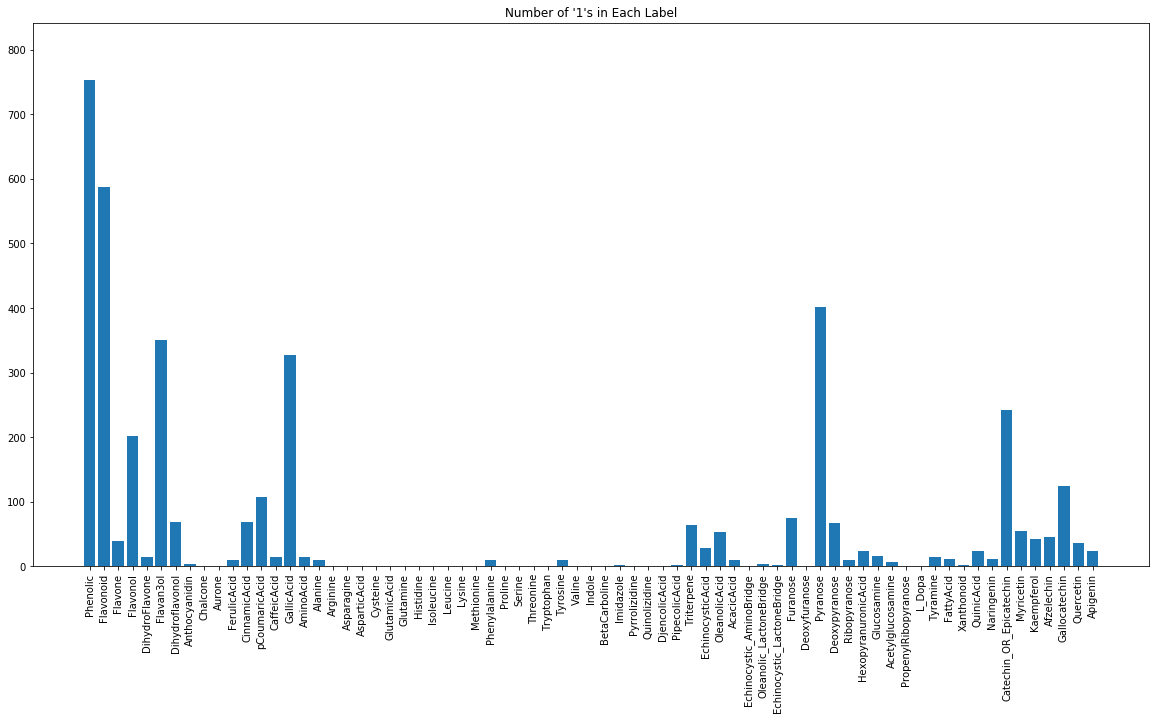

In [288]:
plt.bar(np.arange(n_labels_inga),n_ones_inga)
plt.xticks(np.arange(n_labels_inga), n_ones_inga.index, rotation='vertical')
plt.ylim([0,n_records_inga])
plt.title('Number of \'1\'s in Each Label')
plt.show()

### In Silico Data

In [289]:
y_silico = new_classes_silico.iloc[:,:-1]
y_silico.head()

,Phenolic,Flavonoid,Flavone,Flavonol,DihydroFlavone,Flavan3ol,Dihydroflavonol,Anthocyanidin,Chalcone,Aurone,...,Xanthonoid,QuinicAcid,Naringenin,Catechin_OR_Epicatechin,Myricetin,Kaempferol,Afzelechin,Gallocatechin,Quercetin,Apigenin
comp_id,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [290]:
n_ones_silico =  y_silico.sum()
n_records_silico =  y_silico.shape[0]
n_labels_silico =  y_silico.shape[1]

In [291]:
for i in range(n_labels_silico):
    print('{0:35s} {1:3d} / {2:3d}'.format(n_ones_silico.index[i], int(n_ones_silico[i]), n_records_silico))

Phenolic                            38474 / 75785
Flavonoid                           11817 / 75785
Flavone                             5199 / 75785
Flavonol                            4989 / 75785
DihydroFlavone                      1822 / 75785
Flavan3ol                           1651 / 75785
Dihydroflavonol                     759 / 75785
Anthocyanidin                         4 / 75785
Chalcone                             19 / 75785
Aurone                              142 / 75785
FerulicAcid                         1922 / 75785
CinnamicAcid                        1627 / 75785
pCoumaricAcid                       2214 / 75785
CaffeicAcid                         1779 / 75785
GallicAcid                          2355 / 75785
AminoAcid                           5536 / 75785
Alanine                             658 / 75785
Arginine                              2 / 75785
Asparagine                          133 / 75785
AsparticAcid                        111 / 75785
Cysteine                  

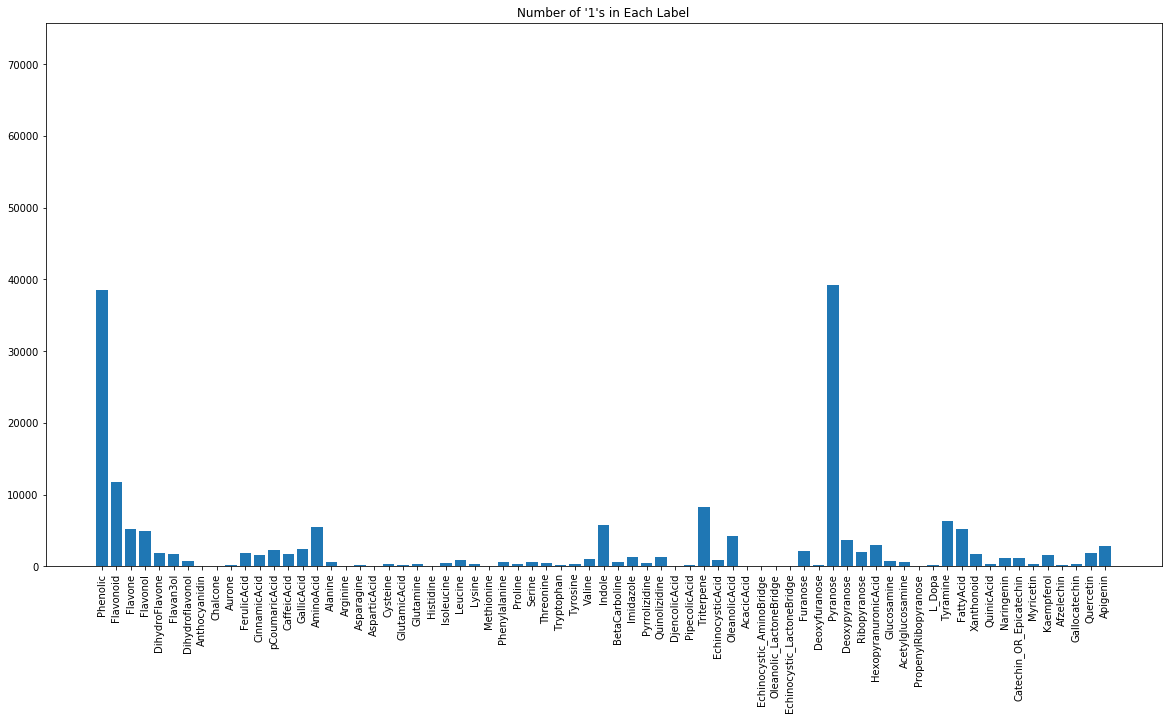

In [292]:
plt.bar(np.arange(n_labels_silico),n_ones_silico)
plt.xticks(np.arange(n_labels_silico), n_ones_silico.index, rotation='vertical')
plt.ylim([0,n_records_silico])
plt.title('Number of \'1\'s in Each Label')
plt.show()

## Writing to Files

In [143]:
save_npz('features_inga', mat_features_inga)

In [144]:
save_npz('features_silico', mat_features_silico)

In [145]:
np.save('features_inga', mat_features_inga.todense())

In [146]:
np.save('features_silico', mat_features_silico.todense())

In [314]:
np.save('classes_inga', mat_classes_inga)

In [315]:
np.save('classes_silico', mat_classes_silico)